# Génération de partition de musique : réseau LSTM

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import os
import json

In [3]:
sys.path.append('/content/drive/MyDrive/LSTM')
sys.path.append('/content/drive/MyDrive/data')
sys.path.append('/content/drive/MyDrive/')

In [4]:
from melodypreprocessor import *
from melodygenerator import *
from biLSTM import *
from train import *
from extract_data import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

import matplotlib.pyplot as plt

In [5]:
melody_preprocessor = MelodyPreprocessor("/content/drive/MyDrive/data/datasetA.json", batch_size=32)
train_dataset = melody_preprocessor.create_training_dataset()
vocab_size = melody_preprocessor.number_of_tokens_with_padding
max_length_melody = melody_preprocessor.max_melody_length

print("Taille du vocabulaire :",vocab_size)
print("Taille de la plus grande mélodie :",max_length_melody)

Taille du vocabulaire : 317
Taille de la plus grande mélodie : 249


### Modèle biLSTM

In [6]:
embedding_dim = 64
model = BiLSTM(vocab_size,embedding_dim,max_length_melody)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
epochs = 10
iters,losses = train(train_dataset,model,epochs)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 6 Batch 651 Loss 0.023470448330044746
Epoch 6 Batch 652 Loss 0.03197650983929634
Epoch 6 Batch 653 Loss 0.02935306914150715
Epoch 6 Batch 654 Loss 0.02126478962600231
Epoch 6 Batch 655 Loss 0.008360717445611954
Epoch 6 Batch 656 Loss 0.02562321349978447
Epoch 6 Batch 657 Loss 0.029020870104432106
Epoch 6 Batch 658 Loss 0.02452799864113331
Epoch 6 Batch 659 Loss 0.029543397948145866
Epoch 6 Batch 660 Loss 0.029919134452939034
Epoch 6 Batch 661 Loss 0.022603057324886322
Epoch 6 Batch 662 Loss 0.033504191786050797
Epoch 6 Batch 663 Loss 0.02572709321975708
Epoch 6 Batch 664 Loss 0.019560016691684723
Epoch 6 Batch 665 Loss 0.027083026245236397
Epoch 6 Batch 666 Loss 0.018426211550831795
Epoch 6 Batch 667 Loss 0.014871281571686268
Epoch 6 Batch 668 Loss 0.010390672832727432
Epoch 6 Batch 669 Loss 0.01467496994882822
Epoch 6 Batch 670 Loss 0.03110526129603386
Epoch 6 Batch 671 Loss 0.011659469455480576
Epoch 

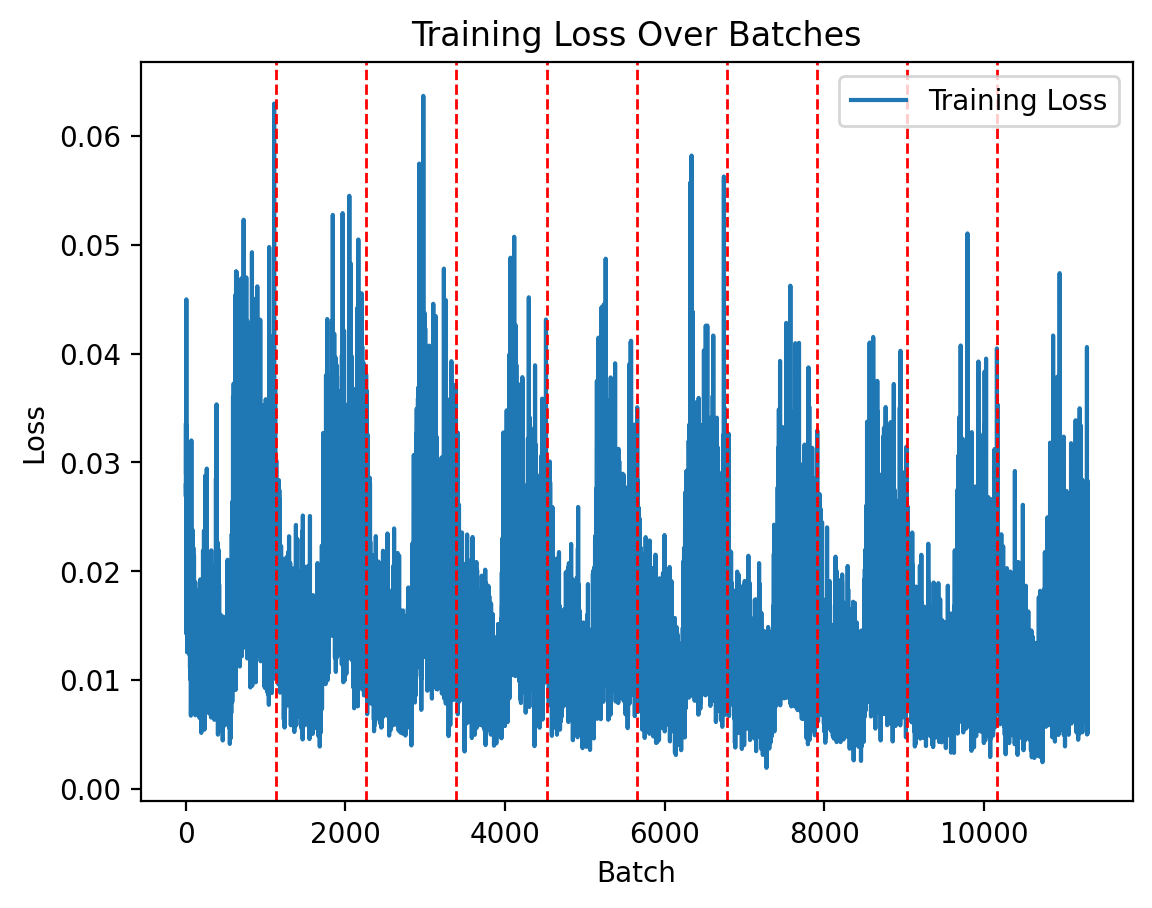

In [20]:
def plot_losses(iters,losses):
    plt.plot(iters,losses, label='Training Loss')
    for i in range(1130,len(iters),1130):
        plt.axvline(x=i, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Batches')
    plt.legend()
    plt.show()

plot_losses(iters,losses)

In [32]:
k = 6

seq = extract_random_seq("/content/drive/MyDrive/data/data.json",k)
print("Séquence initiale :\n",seq)
print()
original = extract_seq_from("/content/drive/MyDrive/data/data.json",seq[0],seq[2])
print("Séquence d'origine :\n",original)

B
Séquence initiale :
 ['SEDUTOR', '2/4', 'B', 'D major', ['D4-1.0', 'rest-1.0', 'rest-0.25', 'A4-0.25', 'C5-0.25', 'F5-0.25']]

Séquence d'origine :
 ['SEDUTOR', 'B', 'D major', ['D4-1.0', 'rest-1.0', 'rest-0.25', 'A4-0.25', 'C5-0.25', 'F5-0.25', 'B-5-0.25', 'A5-0.5', 'A5-0.25', 'A5-0.25', 'G5-0.25', 'B4-0.25', 'D5-0.25', 'A5-0.5', 'G5-0.25', 'F5-0.25', 'E5-0.25', 'G4-0.25', 'B-4-0.25', 'F5-0.5', 'E5-0.25', 'D5-0.25', 'C5-0.25', 'F5-0.25', 'D5-0.25', 'C5-1.0', 'rest-0.25', 'G#4-0.25', 'A4-0.25', 'C5-0.25', 'G5-0.25', 'F5-0.5', 'F5-0.25', 'F5-0.25', 'E5-0.25', 'G5-0.25', 'G-5-0.25', 'F5-0.25', 'E5-0.25', 'C#5-0.25', 'A4-0.25', 'E5-0.25', 'D5-0.25', 'B4-0.25', 'G4-0.25', 'F4-0.5', 'E5-0.25', 'D5-0.25', 'C5-0.25', 'G4-0.25', 'A4-0.25', 'B-4-1.0', 'rest-0.25', 'A4-0.25', 'C5-0.25', 'F5-0.25', 'B-5-0.25', 'A5-0.5', 'A5-0.25', 'A5-0.25', 'G5-0.25', 'B4-0.25', 'D5-0.25', 'A5-0.5', 'G5-0.25', 'F5-0.25', 'E5-0.25', 'G4-0.25', 'A4-0.25', 'C#5-0.25', 'E5-0.25', 'G5-0.25', 'F5-0.25', 'E5-0.25', '

In [34]:
melody_generator = MelodyGenerator(model,melody_preprocessor.tokenizer,10)

new_melody,proba = melody_generator.generate(seq[-1],mode=2)
print("Sans teacher forcing:",proba)
new_melody,proba = melody_generator.generate(seq[-1],teacher_forcing=True,melody=original[-1],mode=2)
print("Avec teacher forcing:",proba)

Sans teacher forcing: [1, 1, 1, 1, 1, 1, 0.04907833, 0.04915016, 0.053579655, 0.04903467, 0.04914788]
Avec teacher forcing: [1, 1, 1, 1, 1, 1, 0.049114592, 0.04908173, 0.04911218, 0.053524807, 0.049081467]


In [35]:
melodies_generated=[]

In [37]:
k = 10

for _ in range(20):
    print("Generating a melody...")
    seq = extract_random_seq("/content/drive/MyDrive/data/data.json",k,"A")
    original = extract_seq_from("/content/drive/MyDrive/data/data.json",seq[0],seq[2])
    new_melody,p = melody_generator.generate(seq[-1],teacher_forcing=True,melody=original[-1],mode=2,k=40)
    melodies_generated.append((seq,new_melody,original,p))

Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A


In [38]:
generated = [ {'Title' : s[0] , 'Part': s[2], 'Key' : s[3] ,'Start_sequence' :s[4] ,'Proba': [ str(proba) for proba in p] ,'Generated' : m.split() , 'Original' : o[-1]} for (s,m,o,p) in melodies_generated ]
print(len(generated))

33


In [40]:
with open("/content/drive/MyDrive/Generated/bilstm.json","w") as f:
    json.dump(generated,f,indent=2)